<a href="https://colab.research.google.com/github/paddy960609/calicalifornia-housing-prediction/blob/main/housingprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/california-housing-prices


In [2]:
import pandas as pd
!pip install jupyterthemes
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
import joblib
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.activations import relu,linear
# from tensorflow.keras.losses import SparseCategoricalCrossentropy
# from tensorflow.keras.optimizers import Adam
!pip install plotly
import plotly.express as px
from jupyterthemes import jtplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.1 MB/s eta 0:00:00


In [3]:
CaliHousingTest_df = pd.read_csv('sample_data/california_housing_test.csv')
CaliHousingTrain_df = pd.read_csv('sample_data/california_housing_train.csv')
combined_df = pd.concat([CaliHousingTest_df, CaliHousingTrain_df], ignore_index=True)

In [4]:
combined_df.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [5]:
combined_df.shape


(20000, 9)

In [6]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20000 non-null  float64
 1   latitude            20000 non-null  float64
 2   housing_median_age  20000 non-null  float64
 3   total_rooms         20000 non-null  float64
 4   total_bedrooms      20000 non-null  float64
 5   population          20000 non-null  float64
 6   households          20000 non-null  float64
 7   median_income       20000 non-null  float64
 8   median_house_value  20000 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
combined_df.dropna(inplace=True)

<Axes: >

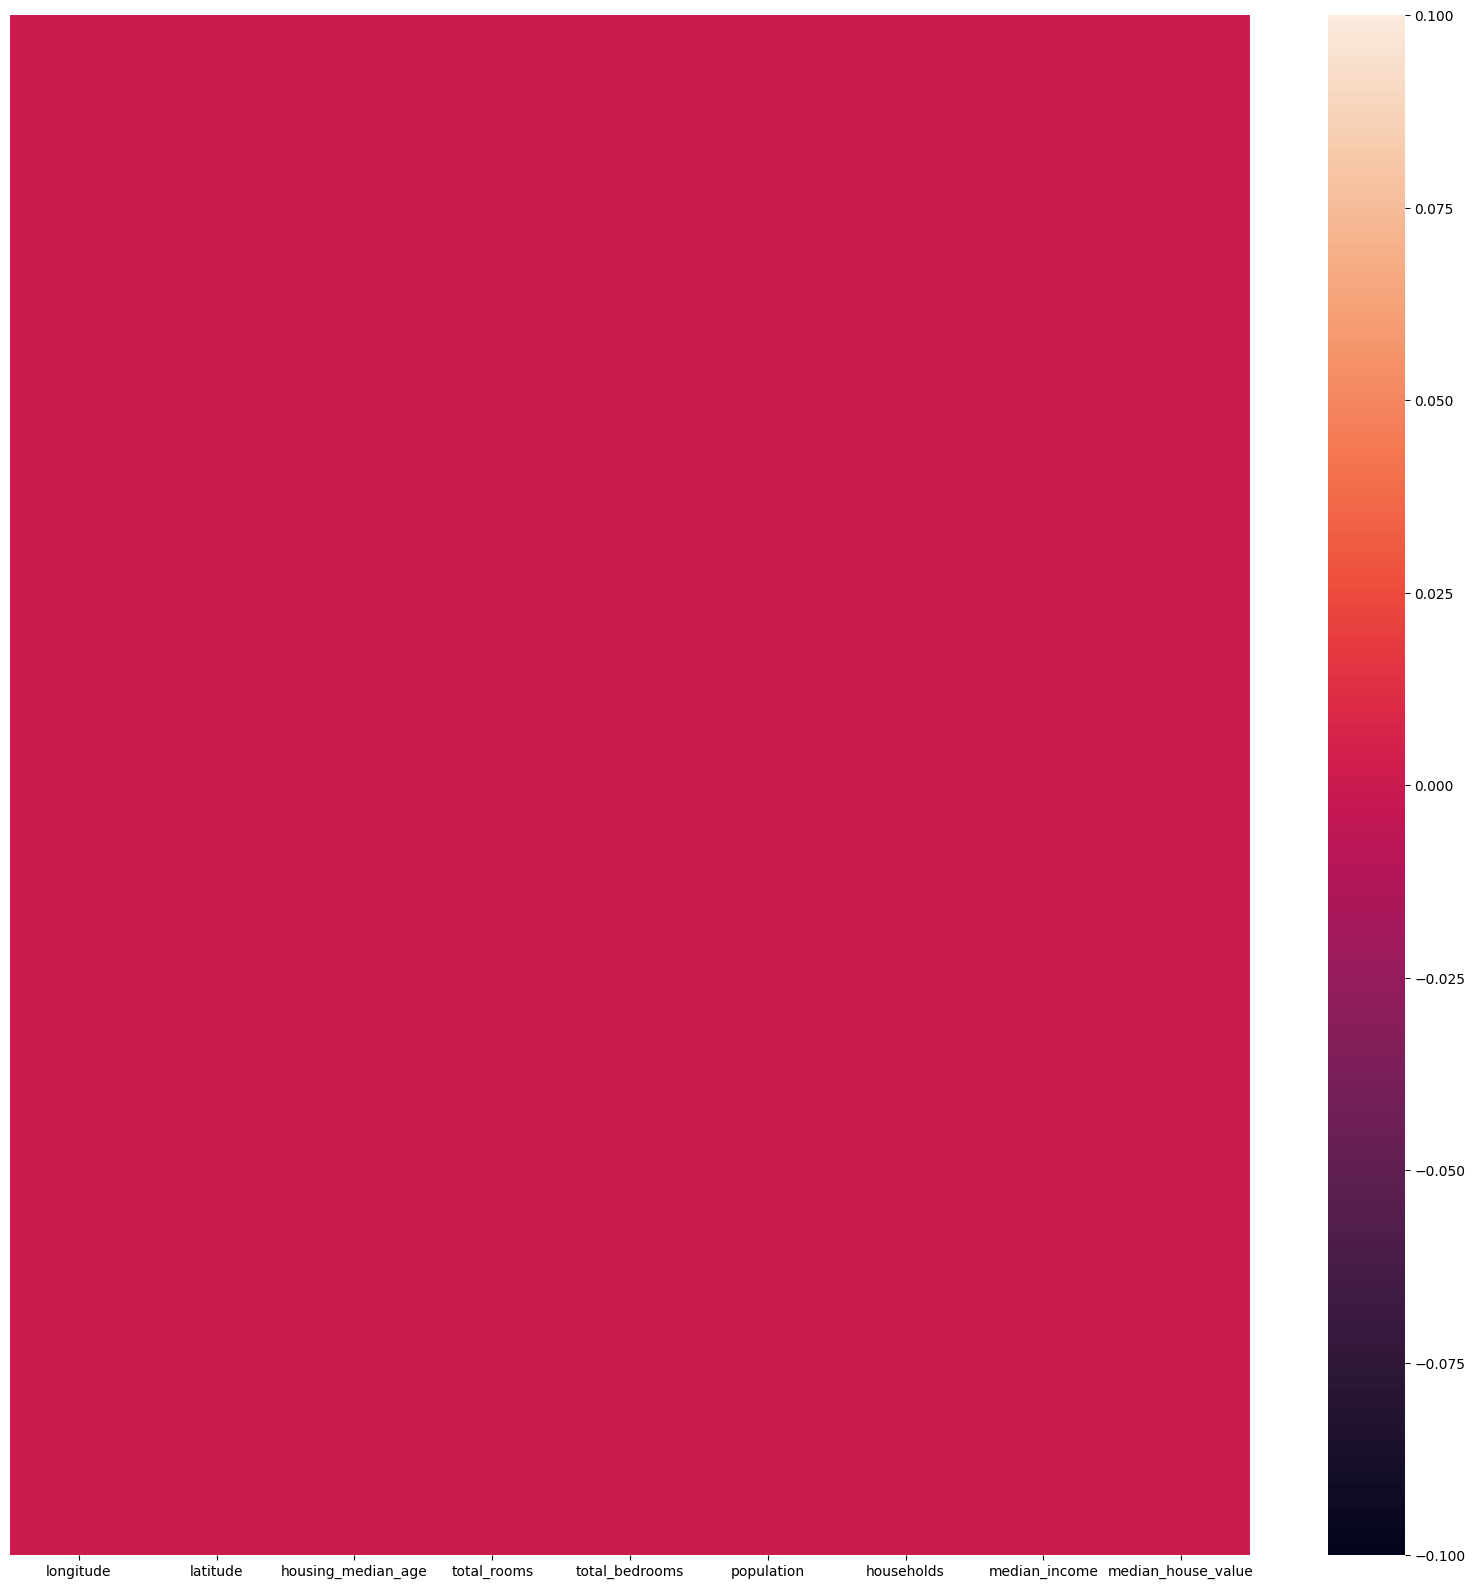

In [8]:
combined_df.isnull()
plt.figure(figsize = (20,20))
sns.heatmap(CaliHousingTest_df.isnull(), yticklabels = False)

In [51]:
target_df = combined_df['median_house_value']
input_df = combined_df.drop(columns = ['median_house_value'])
X = np.array(input_df).astype('float32')
y = np.array(target_df).astype('float32')
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Split into train (60%), val (20%), test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


In [52]:
# Train an XGBoost classifier model
!pip install xgboost
from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
from xgboost import XGBRegressor
model = XGBRegressor(
    learning_rate=0.1,
    max_depth=6,
    n_estimators=800,
    objective='reg:squarederror',
    random_state=42,
)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=800,
             n_jobs=None, num_parallel_tree=None, ...)

In [53]:
result_train = model.score(X_train, y_train)
result_train

0.9849433898925781

In [54]:
# predict the score of the trained model using the testing dataset
result_test = model.score(X_test, y_test)
result_test

0.8324411511421204

In [43]:
# make predictions on the test data
y_predict = model.predict(X_test)

In [14]:
# from sklearn.metrics import confusion_matrix, classification_report
# print(classification_report(y_test, y_predict))

In [45]:
print(f"Train R²: {model.score(X_train, y_train):.2f}")
print(f"Validation R²: {model.score(X_val, y_val):.2f}")
print(f"Test R²: {model.score(X_test, y_test):.2f}")


Train R²: 0.98
Validation R²: 0.84
Test R²: 0.83


In [44]:
rmse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"✅ Model Trained")
print(f"📈 RMSE: {rmse:.2f}")
print(f"📊 R² Score: {r2:.2f}")

# 6. Save model and scaler
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/xgboost_regressor.pkl")
joblib.dump(scaler, "models/scaler.pkl")
print("💾 Model and scaler saved to /models/")

✅ Model Trained
📈 RMSE: 2268497920.00
📊 R² Score: 0.83
💾 Model and scaler saved to /models/


In [18]:
y = np.log1p(combined_df['median_house_value'])

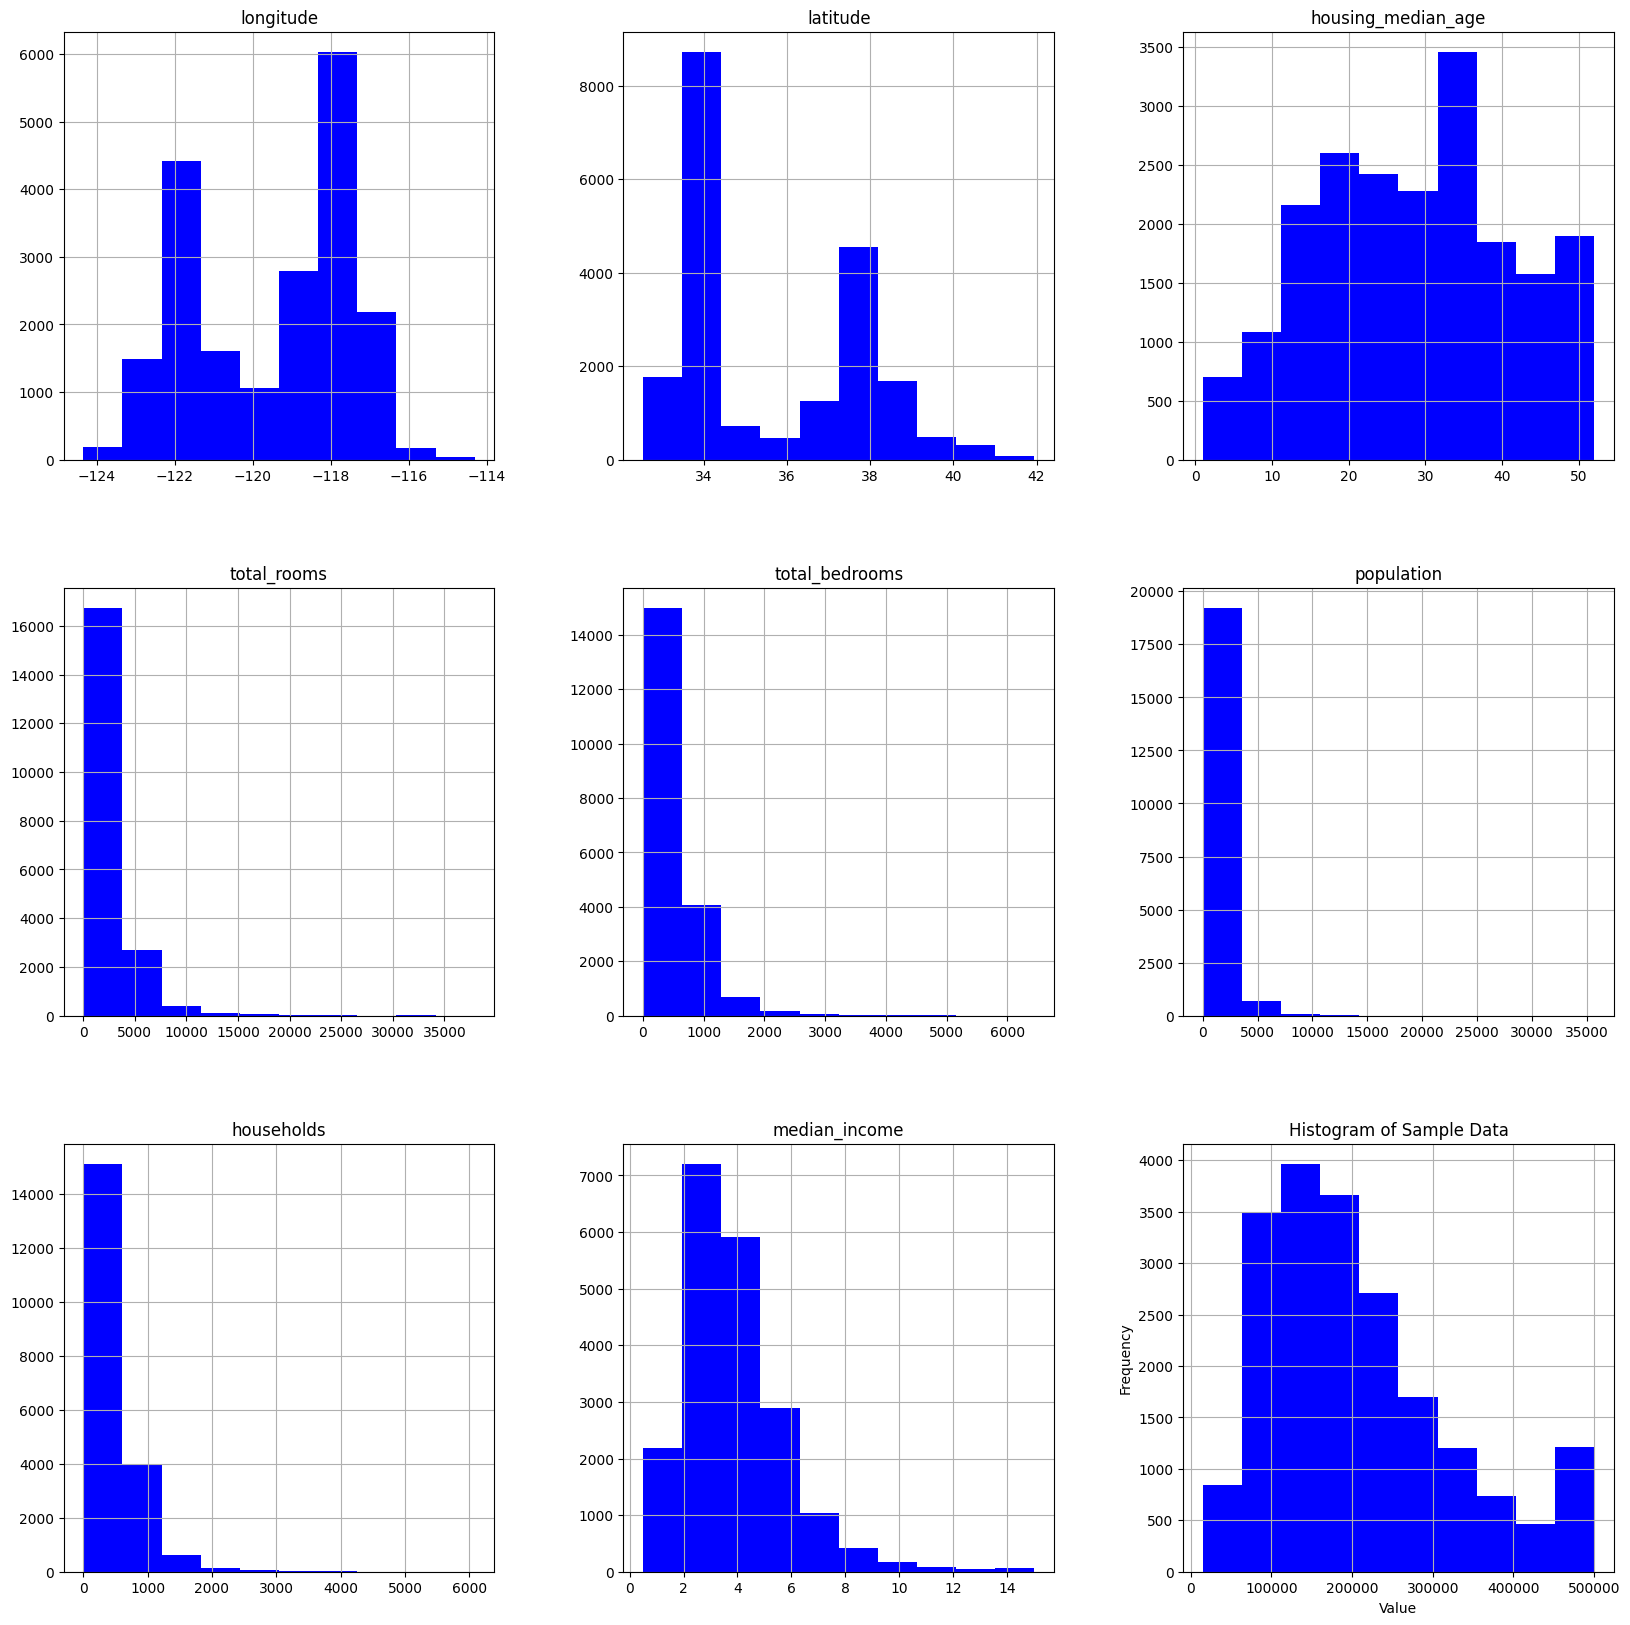

In [19]:
# Create the histogram
combined_df.hist(bins=10, figsize = (20,20), color = 'b')

# Add labels and title for clarity
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Sample Data")

# Display the plot
plt.show()

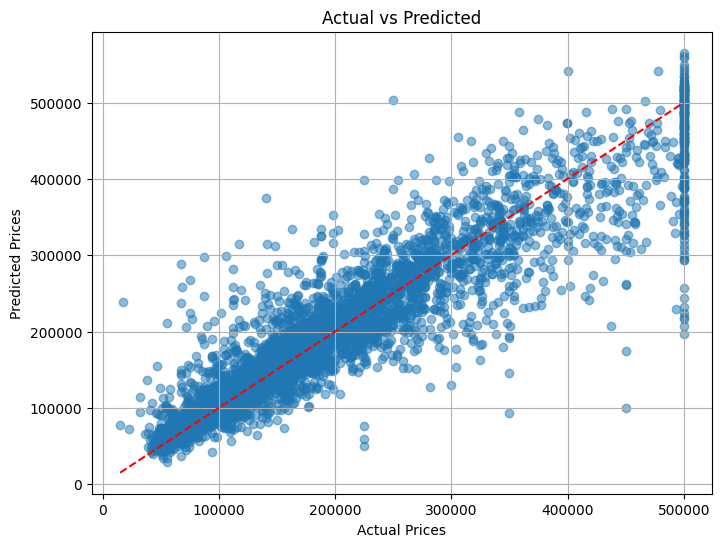

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid()
plt.show()

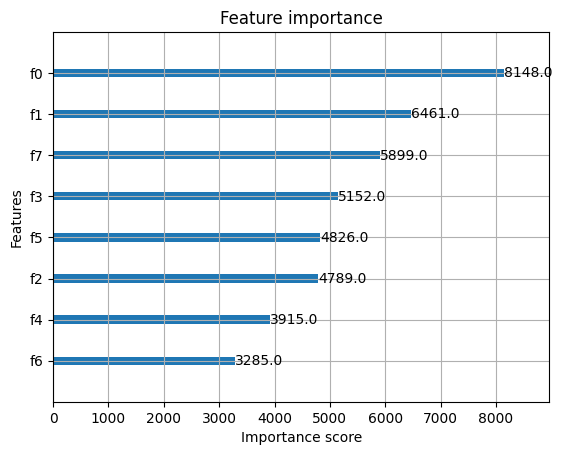

In [56]:
from xgboost import plot_importance
plot_importance(model)
plt.show()